![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [5]:
# Loading the insurance dataset
insurance_data_path = 'data/insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


# Task 1 : Clean up the data

In [69]:
# Task # 1 : Clean up the data
### - Check for missing values - done
### - standardize categories in region --done
### - standardize sex to just 2 categories  --done
### - change string values of smoker to  boolean values  --done
### - standardize charges data types (float) and remove $ sign  --done
### - remove negative values from age 

# 1.1 Check for missing values
insurance_filled = insurance.dropna()

# 1.2 Standardize categories in region
insurance_filled['region'] = insurance_filled['region'].str.lower()

# 1.3 Standardize sex to just 2 categories
FEMALE = 'female'
MALE = 'male'
sex_map = {'F':FEMALE,'woman':FEMALE,'man':MALE,'M':MALE}

insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)

# 1.4 Change string values of smoker to boolean values
insurance_filled['smoker'] = (insurance_filled['smoker'] == 'yes')

# 1.5 Standardize charges data types (float) and remove $ sign
insurance_filled['charges'] = insurance_filled['charges'].str.strip('$').astype(float)

# 1.6 remove negative values from age -  change negative to positive
insurance_filled['age'] = insurance_filled['age'].abs()

insurance_pos = insurance_filled.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

insurance_pos.to_csv('data/insurance_cleaned.csv',index=False)

# insurance_filled['smoker'].unique()    
insurance_filled.info()    
# insurance_pos.sample(5)
# insurance_filled.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB


C:\Users\INSPIRE COMP\AppData\Local\Temp\ipykernel_13956\765018215.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['region'] = insurance_filled['region'].str.lower()
C:\Users\INSPIRE COMP\AppData\Local\Temp\ipykernel_13956\765018215.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)
C:\Users\INSPIRE COMP\AppData\Local\Temp\ipykernel_13956\765018215.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy 

# Task 2: Scatter Plot of relationships b/w variable and charges.

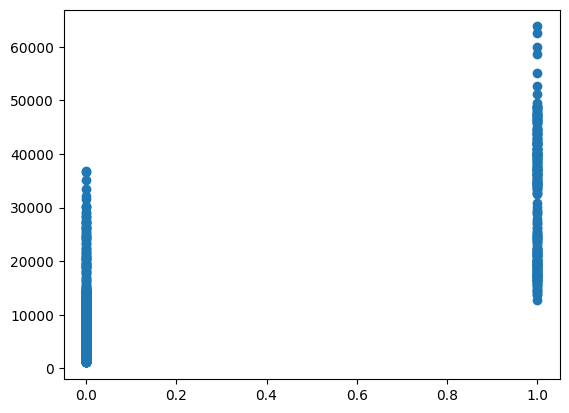

In [56]:
# Task 2: Scatter Plot of relationships b/w variable and charges.

import matplotlib.pyplot as plt

df = insurance_pos.copy()

plt.scatter(df['smoker'], df['charges'])



# Task 3: Prepare the data for model fitting

In [71]:
# Task 3: Prepare the data for model fitting

df_new = pd.get_dummies(df, prefix=['region'],columns=['region'])
df_new = df_new.drop(columns=['region_southeast'])

df_new['smoker'] = df_new['smoker'].astype('int64')

df_new['is_male'] =( df_new['sex'] =='male').astype('int64')
df_new = df_new.drop(columns=['sex'])

df_new = df_new.dropna(subset=['charges'])
df_new.head(12)

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,False,False,True,0
1,18.0,33.770,1.0,0,1725.55230,False,False,False,1
2,28.0,33.000,3.0,0,4449.46200,False,False,False,1
3,33.0,22.705,0.0,0,21984.47061,False,True,False,1
4,32.0,28.880,0.0,0,3866.85520,False,True,False,1
5,31.0,25.740,0.0,0,3756.62160,False,False,False,0
6,46.0,33.440,1.0,0,8240.58960,False,False,False,0
7,37.0,27.740,3.0,0,7281.50560,False,True,False,0
8,37.0,29.830,2.0,0,6406.41070,True,False,False,1
9,60.0,25.840,0.0,0,28923.13692,False,True,False,0


# Task 4: Fit a linear regression model to our data

In [ ]:
# Task 4: Fit a linear regression model to our data

# importing required libraries 
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Splitting the data into training and testing sets
X = df_new.drop(columns=['charges'])
# X = df_new.drop(columns=['charges','is_male','age','smoker'])
y = df_new['charges']

# sploitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
model = LinearRegression()
# model = KernelRidge()
model.fit(X_train, y_train)

# Predicting the output
y_pred = model.predict(X_test)

# Calculating the R2 Score
r2_score = r2_score(y_test, y_pred)

# Printing the R2 Score
print('R2 Score:', r2_score)
# print('R2 Score without charges:', 0.7051286147918414)
# print('R2 Score without charges, ismale, and age:', 0.6377967280007002)
# print('R2 Score without charges, ismale, age, and smoker:', 0.01817343509253877)
# print('R2 Score without charges, ismale, age, smoker, and region_northwest, region_southwest:', 0.021583828884659373)

R2 Score: 0.7049323160872817


# Task 5: See how model performs on validation dataset
- Subtask: create helper function to preprocess dataframe

In [92]:
# Task 5: See how model performs on validation dataset
#- Subtask: create helper function to preprocess dataframe

def preprocess_df(df):
    df_new = pd.get_dummies(df, prefix=['region'],columns=['region'])
    df_new = df_new.drop(columns=['region_southeast'])

    df_new['smoker'] = (df_new['smoker'] == 'yes')
    df_new['smoker'] = df_new['smoker'].astype('int64')

    df_new['is_male'] =( df_new['sex'] =='male').astype('int64')
    df_new = df_new.drop(columns=['sex'])

    return df_new

In [94]:
val_df = pd.read_csv('data/validation_dataset.csv')
input_df = preprocess_df(val_df)

predictions = model.predict(input_df)

predictions_new = [x if x>0 else 1000 for x in predictions]

validation_data = val_df.copy()

validation_data['charges'] = predictions_new

validation_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,18.0,female,24.090000,1.0,no,southeast,352.537878
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
5,70.0,female,72.958351,11.0,yes,southeast,58677.838443
6,29.0,female,32.110000,2.0,no,northwest,7044.405963
7,42.0,female,41.325000,1.0,no,northeast,13065.658004
8,48.0,female,36.575000,0.0,no,northwest,12665.703636
9,63.0,male,33.660000,3.0,no,southeast,16142.541083
